# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seeds for reproducibility

In [2]:
torch.manual_seed(42)

# Loading the Dataset 

In [4]:
df = pd.read_csv('FMNIST_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


# Create a 4X4 grid of images

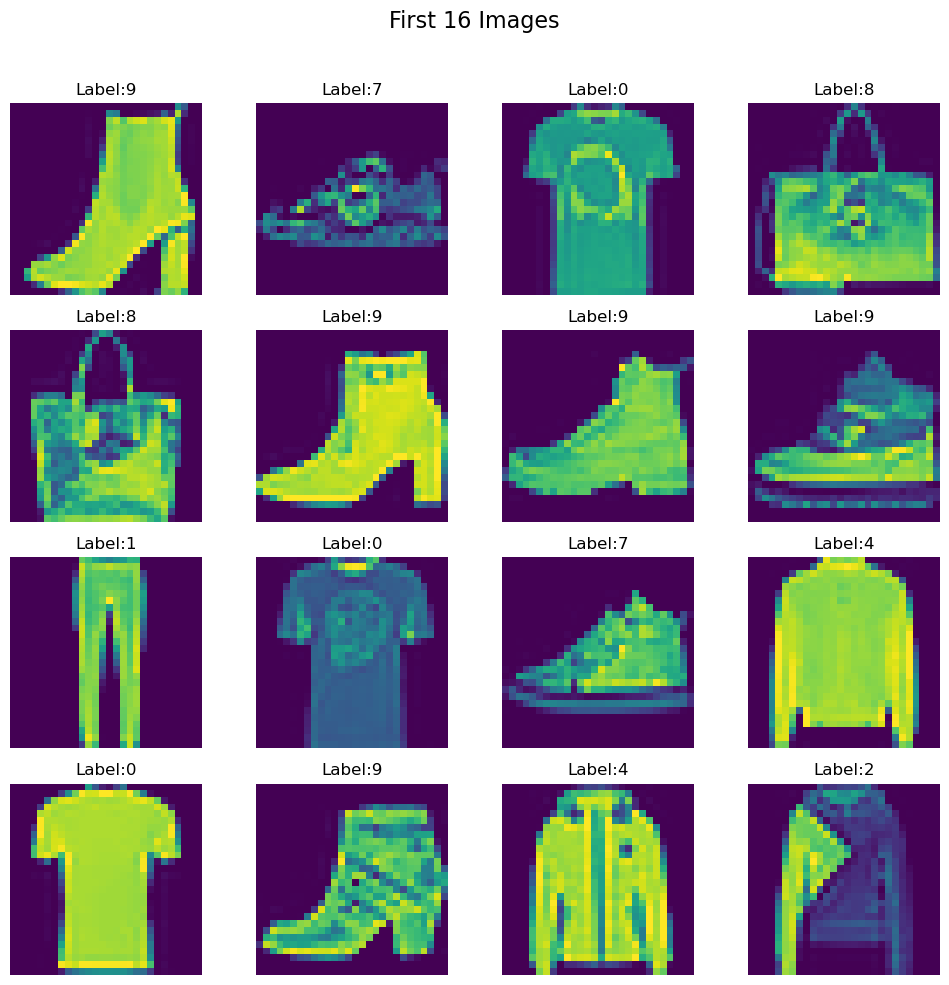

In [5]:
fig, axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 image from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f'Label:{df.iloc[i,0]}')  # Show the label
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# Train test split

In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling the features

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [18]:
# Create CustomDataset class
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.feature = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.feature)
    def __getitem__(self, index):
        return self.feature[index], self.labels[index]

# Create train dataset object

In [19]:
train_dataset = CustomDataset(X_train, y_train)

# create test_dataset object

In [20]:
test_dataset = CustomDataset(X_test, y_test)

# create train and test loader

In [21]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define NN class

In [31]:
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10))
  def forward(self, x):
    return self.model(x)

In [32]:
# Set learning rate and epochs

In [33]:
epochs = 100
learning_rate = 0.1

In [34]:
# Instatiate the model
model = MyNN(X_train.shape[1])
# Loss Function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
len(train_loader)

150

In [38]:
# Training loop

In [40]:
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_label in train_loader:
        # Forward pass
        output = model(batch_features)
        # Calculate loss
        loss = criterion(output, batch_label)
        # Back pass
        optimizer.zero_grad()
        loss.backward()
        # Update grads
        optimizer.step()
        total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch:{epoch+1}, Loss:{avg_loss}')

Epoch:1, Loss:1.3121701649824777
Epoch:2, Loss:0.7721599439779917
Epoch:3, Loss:0.6593166546026865
Epoch:4, Loss:0.5867497074604034
Epoch:5, Loss:0.5472839274009069
Epoch:6, Loss:0.5090140092372895
Epoch:7, Loss:0.4755649623274803
Epoch:8, Loss:0.452524018685023
Epoch:9, Loss:0.43602420007189113
Epoch:10, Loss:0.40978985677162805
Epoch:11, Loss:0.38450583443045616
Epoch:12, Loss:0.3665012988448143
Epoch:13, Loss:0.35678070078293483
Epoch:14, Loss:0.3392642150322596
Epoch:15, Loss:0.33629109437266985
Epoch:16, Loss:0.3182913580785195
Epoch:17, Loss:0.3007312404115995
Epoch:18, Loss:0.2947612479329109
Epoch:19, Loss:0.2734755895038446
Epoch:20, Loss:0.28650423041234413
Epoch:21, Loss:0.25967952857414883
Epoch:22, Loss:0.2605478206773599
Epoch:23, Loss:0.24783893078565597
Epoch:24, Loss:0.22891612087686858
Epoch:25, Loss:0.22027611607064804
Epoch:26, Loss:0.2159252435217301
Epoch:27, Loss:0.19678067247072856
Epoch:28, Loss:0.20680996622890235
Epoch:29, Loss:0.21315336612363656
Epoch:30, L

In [41]:
# Set model to eval mode

In [44]:
model.eval

<bound method Module.eval of MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)>

In [45]:
# Evaluation Code

In [46]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()
print(correct/total)

0.8483333333333334


In [47]:
len(test_loader)

38